In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=15,8

In [6]:
# We will be working on cleaned and feature enginnered data obtained from task2.

In [7]:
df=pd.read_csv('Feature_Engineered_Data.csv')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,Total_var,Total_fix,off_peak_energy_negative_avg,off_peak_power_negative_avg,off_peak_energy_negative_max,off_peak_power_negative_max,off_peak_energy_positive_avg,off_peak_power_positive_avg,off_peak_energy_positive_max,off_peak_power_positive_max
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,3.504802,938.347394,-3.381130,0.000000,-6.495543,0.000000,24.305621,3.029476,24.305621,8.686820
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,1.880790,531.736503,-1.770692,-0.000003,-2.947802,-0.000003,1.073045,0.401609,1.073045,0.401609
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,3.107195,532.625404,-1.354201,0.000000,-2.684050,0.000000,0.000000,0.401606,0.000000,0.401606
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,1.814521,532.803183,-1.485466,0.000000,-2.915425,0.000000,0.000000,0.401606,0.000000,0.401606
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,3.608133,976.515746,-6.372446,0.000000,-6.372446,0.000000,1.561484,0.401607,1.561484,0.401607


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [9]:
# Also drop the datetime columns, which will be helpful later not in model building

df.drop(df.columns[5:9],1,inplace=True)

In [10]:
df.drop('id',1,inplace=True)

In [11]:
#Changing the data and datatype of certain columns to numerical for making ready for model.

df.has_gas.replace({'t':1,'f':0},inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   channel_sales                   14606 non-null  object 
 1   cons_12m                        14606 non-null  int64  
 2   cons_gas_12m                    14606 non-null  int64  
 3   cons_last_month                 14606 non-null  int64  
 4   forecast_cons_12m               14606 non-null  float64
 5   forecast_cons_year              14606 non-null  int64  
 6   forecast_discount_energy        14606 non-null  float64
 7   forecast_meter_rent_12m         14606 non-null  float64
 8   forecast_price_energy_off_peak  14606 non-null  float64
 9   forecast_price_energy_peak      14606 non-null  float64
 10  forecast_price_pow_off_peak     14606 non-null  float64
 11  has_gas                         14606 non-null  int64  
 12  imp_cons                        

In [13]:
#Dummy encoding

df_den=pd.get_dummies(df.iloc[:,[0,18]],drop_first=True)
df_den.shape

(14606, 12)

In [14]:
#Concatenate with original dataframe removing the column for which dummy encoding has been performed

df.drop(['channel_sales','origin_up'],1,inplace=True)
df=pd.concat([df,df_den],1)


In [15]:
df.isnull().sum()
#Final check for null values.

cons_12m                                          0
cons_gas_12m                                      0
cons_last_month                                   0
forecast_cons_12m                                 0
forecast_cons_year                                0
forecast_discount_energy                          0
forecast_meter_rent_12m                           0
forecast_price_energy_off_peak                    0
forecast_price_energy_peak                        0
forecast_price_pow_off_peak                       0
has_gas                                           0
imp_cons                                          0
margin_gross_pow_ele                              0
margin_net_pow_ele                                0
nb_prod_act                                       0
net_margin                                        0
num_years_antig                                   0
pow_max                                           0
churn                                             0
price_off_pe

In [16]:
np.abs(df.corr()).loc['churn',:].sort_values(ascending=False) #Checking corelation with our target varibale.

churn                                             1.000000
margin_net_pow_ele                                0.095772
margin_gross_pow_ele                              0.095725
origin_up_lxidpiddsbxsbosboudacockeimpuepw        0.094131
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws        0.080766
channel_sales_foosdfpfkusacimwkcsosbicdxkicaua    0.075964
num_years_antig                                   0.074140
channel_sales_lmkebamcaaclubfxadlmueccxoimlema    0.052946
Total_fix                                         0.051520
price_peak_fix                                    0.046952
price_mid_peak_var                                0.046249
cons_12m                                          0.045968
cons_last_month                                   0.045284
price_mid_peak_fix                                0.044533
forecast_meter_rent_12m                           0.044245
net_margin                                        0.041135
Total_var                                         0.0395

In [17]:
#Diving dataframe to independent and dependent variables

X=df.drop('churn',1)
y=df['churn']

X.shape,y.shape

((14606, 47), (14606,))

In [18]:
# Train-test split in 70:30 ratio

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,y, random_state=10,test_size=0.3)

#Feature selection
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs



#Scoring will be f1 for imbalance in our data.
dt=DecisionTreeClassifier(random_state=10)

dt_sfs=sfs(estimator=dt,k_features='best',verbose=2,scoring='f1')

dt_forward=dt_sfs.fit(xtrain,ytrain)

print('Features selelected using forward selection are: ')
print(dt_forward.k_feature_names_)

#print the R-squared value
print('\nf1-score: ', dt_forward.k_score_)

forward_selected_features=set(dt_forward.k_feature_names_)
len(forward_selected_features)

#Backward elimination

dt_sfs=sfs(estimator=dt,k_features='best',verbose=2,scoring='f1',forward=False,n_jobs=2)

dt_backward=dt_sfs.fit(xtrain,ytrain)

backward_selected_features=set(dt_backward.k_feature_names_)
len(backward_selected_features)

tot=forward_selected_features.intersection(backward_selected_features)
len(tot)

tot

In [ ]:
# As we have decresed the number of columns to most correlated columns, the hyper-parameter max_features will take care of the
#feature selection in random_forest classifier.

In [ ]:
## Lets plot a validation curve to get insights about range for various parameters on a decision tree and use that range for
## grid search cv in random forest , because a validation curve for random forest will take infinity to execute.

In [ ]:
#Validation curve for max_depth parameter

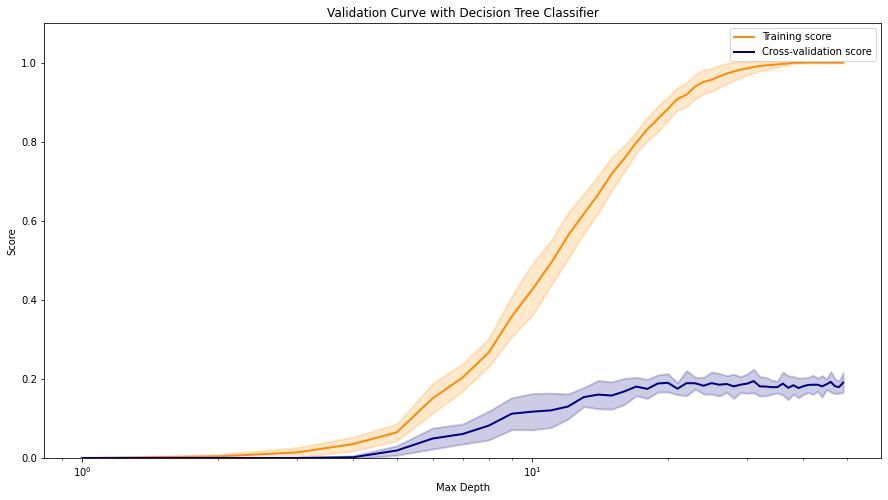

In [31]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), xtrain, ytrain, param_name="max_depth",scoring='f1',param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
# As its a semilog graph, we can see 15, 25 gives ideal range of max_depth for cross validation score.

In [32]:
# Lets do a GridSeacrh CV on Randomforest classifier.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
param=[{'n_estimators':np.arange(30,150,20),'max_depth':np.arange(15,25),'max_features':['sqrt','log2','auto'],
       'criterion':['gini','entropy']}]

rf_grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param,cv=3,scoring='f1') 

In [34]:
rf_grid.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24]),
                          'max_features': ['sqrt', 'log2', 'auto'],
                          'n_estimators': array([ 30,  50,  70,  90, 110, 130])}],
             scoring='f1')

In [35]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 23,
 'max_features': 'sqrt',
 'n_estimators': 30}

In [36]:
# Lets another gridserach cv for finding best n_estimators as it has thrown lowest of given value for n_estimators

In [38]:
param=[{'n_estimators':np.arange(10,30,5),'max_depth':np.arange(23,24,1),'max_features':['sqrt'],
       'criterion':['gini']}]

rf_grid_2=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param,cv=3,scoring='f1') 

In [39]:
rf_grid_2.fit(xtrain,ytrain)
rf_grid_2.best_params_

{'criterion': 'gini',
 'max_depth': 23,
 'max_features': 'sqrt',
 'n_estimators': 15}

In [40]:
# A more granualr search
param=[{'n_estimators':np.arange(12,17,1),'max_depth':np.arange(23,24,1),'max_features':['sqrt'],
       'criterion':['gini']}]

rf_grid_3=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param,cv=3,scoring='f1') 


In [41]:
rf_grid_3.fit(xtrain,ytrain)
rf_grid_3.best_params_

{'criterion': 'gini',
 'max_depth': 23,
 'max_features': 'sqrt',
 'n_estimators': 13}

In [42]:
#These are our best hyperparamets for the random forest classifier.

In [43]:
RF_best=RandomForestClassifier(n_estimators=13,max_features='sqrt',max_depth=23,criterion='gini')
RF_best.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=23, max_features='sqrt', n_estimators=13)

In [44]:
# Importaing various model evalution metrics
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

In [45]:
y_pred=RF_best.predict(xtest)
report=classification_report(ytest,y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3965
           1       0.53      0.06      0.10       417

    accuracy                           0.91      4382
   macro avg       0.72      0.53      0.53      4382
weighted avg       0.87      0.91      0.87      4382



In [ ]:
# Precision recall value for minority classes are too low. Lets do an oversampling using SMOTE.
#Full over-sampling may cause overfitting of minority class data as exact copies are repeated
#Lets define a ratio to oversample, so that imbalance is taken care of while avoiding overfitting of minority class
#There is another problem associated with doing train test split, that there might be data leakage from train set to test set,
# so test set obtained is not purely unseen data for model.
#Smote should only be carried out for train set to model , and test set is left untouched.

In [ ]:
# Before oversampling lets do some feature selection as oversampling using SMOTE is bad for high dimensional data

In [48]:
from sklearn.feature_selection import RFE


In [54]:
# For n_fetures to select, lets take sqrt of total feautures in our data
# We are using sqrt as it was found during first GridSearchCV

round(np.sqrt(X.shape[1]),0)



7.0

In [59]:

#Thumb rule suggests number of sample required for better model training can be found out using following formula
# samples=(no_of_features*10)/expected_prob_of_minority_class

expt_prob=y.value_counts().apply(lambda x:(x/len(y)))[1]   #Probability of minority class
samples=len(xtrain)  #Samples available for training model
no_of_features=(samples*expt_prob)/10

no_of_features

#This suggests we have enough sample for training model which can detect minority class. So we go in somewhere middle ground
#of calculated numbers from sqrt and 99.
#Also lesser the dimension better the smote.
#We will choose 16 as n_features_to_select as while selecting max_features in random forest it gives whole number for both,
#sqrt and log2 value.

99.32805696289196

In [70]:
RF=RandomForestClassifier()
rfe_rf=RFE(estimator=RF,n_features_to_select=16)

rfe_rf.fit(xtrain,ytrain)

RFE(estimator=RandomForestClassifier(), n_features_to_select=16)

In [71]:
#Creating a dataframe for ranking

col_rank=pd.Series(rfe_rf.ranking_,index=xtrain.columns)

best_features=col_rank[col_rank==1].index
best_features

Index(['cons_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'imp_cons', 'margin_gross_pow_ele',
       'margin_net_pow_ele', 'net_margin', 'pow_max', 'price_off_peak_var',
       'price_off_peak_fix', 'Total_var', 'off_peak_energy_negative_avg',
       'off_peak_energy_negative_max'],
      dtype='object')

In [102]:
X_fs=X.loc[:,list(best_features)]   #Creating new X for train test split.
X_fs.head(2)

,cons_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,forecast_price_energy_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,net_margin,pow_max,price_off_peak_var,price_off_peak_fix,Total_var,off_peak_energy_negative_avg,off_peak_energy_negative_max
0,0,0,0.00,0,1.78,0.114481,0.0,25.44,25.44,678.99,43.648,1.497445,491.307186,3.504802,-3.381130,-6.495543
1,4660,0,189.95,0,16.27,0.145711,0.0,16.38,16.38,18.89,13.800,1.795307,531.736503,1.880790,-1.770692,-2.947802


In [103]:
xtrain_sm,xtest_sm,ytrain,ytest=train_test_split(X_fs,y,random_state=10,test_size=0.3)
ytrain.value_counts()

0    9222
1    1002
Name: churn, dtype: int64

In [104]:


from imblearn.over_sampling import SMOTE

over_sam=SMOTE(random_state=10)

X_smote,y_smote=over_sam.fit_resample(xtrain_sm,ytrain)

In [93]:
y_smote.value_counts()  #No of instances for minority class has increased

0    9222
1    9222
Name: churn, dtype: int64

In [77]:
#Lets perform a GridSearchCV for tuning hyperparameter

param=[{'n_estimators':np.arange(30,70,20),'max_depth':np.arange(15,25),'max_features':['sqrt','log2','auto'],
       'criterion':['gini','entropy']}]
rf_grid=GridSearchCV(estimator=RandomForestClassifier(random_state=10),param_grid=param,cv=3)

In [78]:
rf_grid.fit(X_smote,y_smote)  #X_smote y_smotes are over_sampled train datasets.

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24]),
                          'max_features': ['sqrt', 'log2', 'auto'],
                          'n_estimators': array([30, 50])}])

In [79]:
rf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 21,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [80]:
# More tunning required for finding n_estimators. Now lets remove max fetures as sqrt while giving a range of floating point
#values.



param=[{'n_estimators':np.arange(45,55,1),'max_depth':np.arange(20,23),'max_features':np.arange(0.3,0.7,0.1),
       'criterion':['entropy']}]
rf_grid=GridSearchCV(estimator=RandomForestClassifier(random_state=10),param_grid=param,cv=3)

In [81]:
rf_grid.fit(X_smote,y_smote)  

rf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 0.3,
 'n_estimators': 45}

4.8

In [83]:
# More tuning required for n_estimators




param=[{'n_estimators':np.arange(35,45,1),'max_depth':np.arange(18,23),'max_features':np.arange(0.1,0.4,0.1),
       'criterion':['entropy']}]
rf_grid=GridSearchCV(estimator=RandomForestClassifier(random_state=10),param_grid=param,cv=3)
rf_grid.fit(X_smote,y_smote)  

rf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 21,
 'max_features': 0.2,
 'n_estimators': 44}

In [98]:
rf_smote=RandomForestClassifier(n_estimators=45,max_depth=21,max_features=0.2,criterion='entropy',random_state=10)
rf_smote.fit(X_smote,y_smote)

y_pred=rf_smote.predict(xtest_sm)

report=classification_report(ytest,y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3965
           1       0.46      0.11      0.18       417

    accuracy                           0.90      4382
   macro avg       0.69      0.55      0.56      4382
weighted avg       0.87      0.90      0.88      4382



In [88]:
# Recall value has increased but is not acceptable.
#Lets try boosting techniques

(4382,)

In [99]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [101]:
param=[{'n_estimators':np.arange(60,100,10),'learning_rate':[0.00001,0.0001,0.001,0.01,0.1,0.5,1,5,10],
        'loss':['deviance','entropy']}]
gb_grid=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=param,cv=3)

gb_grid.fit(X_smote,y_smote)

gb_grid.best_params_

C:\Users\Shakti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
108 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shakti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shakti\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\Shakti\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueErro

{'learning_rate': 0.5, 'loss': 'deviance', 'n_estimators': 90}

In [105]:
param=[{'learning_rate':np.arange(0.1,0.9,0.1)}]
gb_grid=GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=90),param_grid=param,cv=3)

gb_grid.fit(X_smote,y_smote)

gb_grid.best_params_

{'learning_rate': 0.8}

In [106]:
param=[{'learning_rate':np.arange(0.7,1,0.1)}]
gb_grid=GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=90),param_grid=param,cv=3)

gb_grid.fit(X_smote,y_smote)

gb_grid.best_params_

{'learning_rate': 0.7999999999999999}

In [107]:
gb_best=GradientBoostingClassifier(n_estimators=90,learning_rate=0.8)
gb_best.fit(X_smote,y_smote)

y_pred=gb_best.predict(xtest_sm)

report=classification_report(ytest,y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3965
           1       0.23      0.16      0.19       417

    accuracy                           0.87      4382
   macro avg       0.57      0.55      0.56      4382
weighted avg       0.85      0.87      0.86      4382



In [108]:
# There is increase in recall value but precision fell drastically

In [109]:
from xgboost import XGBClassifier


In [110]:
xg_model=XGBClassifier().fit(X_smote,y_smote)



y_pred=xg_model.predict(xtest_sm)

report=classification_report(ytest,y_pred)

print(report)

C:\Users\Shakti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:38:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3965
           1       0.28      0.12      0.17       417

    accuracy                           0.89      4382
   macro avg       0.60      0.55      0.56      4382
weighted avg       0.85      0.89      0.87      4382



In [111]:
#So gradient boosting was giving best results, till now.

gb_best=GradientBoostingClassifier(n_estimators=90,learning_rate=0.8)
gb_best.fit(X_smote,y_smote)

y_pred=gb_best.predict(xtest_sm)

report=classification_report(ytest,y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3965
           1       0.23      0.16      0.19       417

    accuracy                           0.87      4382
   macro avg       0.57      0.55      0.56      4382
weighted avg       0.85      0.87      0.86      4382



In [ ]:
# Low recall value means it has less capacity to detect churn 
#low precision means it has less capacity to predict churn
